In [1]:
import potcorr
import psutil
import os
import lab
import numpy as np
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import inv
import sys
#from pympler import asizeof
import io_xsf 
import matplotlib.pyplot as plt

In [2]:
cell = lab.bn_12x12
# cell = lab.mos2_tt
#cell = lab.bn_6x6
print('Starting job for '+cell['prefix']+'...')

#Eps0 =  read_eps.Epsmat(cell['folder']+'chi0mat.h5')
#Eps1 = read_eps.Epsmat(cell['folder']+'chimat.h5')
#np.save(cell['folder']+'chi0mat.npy', Eps1.mat)

ttkw=potcorr.PotCorr(cell)
print(ttkw.prefix)
print(ttkw.lattpara_unit)
# print(type(mos2.lattpara_unit))

ttkw.fft_init()
ttkw.get_vcoul()
ttkw.epsmat_init_interp(G_vec2ind_dict=cell['folder_G_info']+'G_vec2ind.pkl',
                        G_ind2vec_dict=cell['folder_G_info']+'G_ind2vec.pkl')
#print(ttkw.g_tuple_floor_tt)
#print(ttkw.g_rhoind_tt)
#print(ttkw.g_tuple_q_tt)

with open(cell['folder_model']+'model_all_re.pkl','rb') as file:
    model_all_re = pickle.load(file)
with open(cell['folder_model']+'model_all_im.pkl','rb') as file:
    model_all_im = pickle.load(file)
with open(cell['folder_G_info']+'Gind_list.pkl','rb') as file:
    Gind_list = pickle.load(file)




Starting job for bn...
bn
[ 2.51  2.51 25.  ]
Begin FFT grids Initialization
FFT grids:   216    216    180
Constructing Coulomb kernel...
ibrav= 4


d:\github\potcorr\potcorr.py:77: RuntimeWarning: divide by zero encountered in divide
  self.v_coul = 8*np.pi/(self.k_squared)
d:\github\potcorr\potcorr.py:81: RuntimeWarning: divide by zero encountered in divide
  self.v_coul2d = 8*np.pi/(self.k_squared)*(1-np.exp(-0.5*self.kxy*self.lattpara[2])*np.cos(0.5*self.fft_kzz*self.lattpara[2]))
d:\github\potcorr\potcorr.py:81: RuntimeWarning: invalid value encountered in multiply
  self.v_coul2d = 8*np.pi/(self.k_squared)*(1-np.exp(-0.5*self.kxy*self.lattpara[2])*np.cos(0.5*self.fft_kzz*self.lattpara[2]))


0 / 216
1 / 216
2 / 216
3 / 216
4 / 216
5 / 216
6 / 216
7 / 216
8 / 216
9 / 216
10 / 216
11 / 216
12 / 216
13 / 216
14 / 216
15 / 216
16 / 216
17 / 216
18 / 216
19 / 216
20 / 216
21 / 216
22 / 216
23 / 216
24 / 216
25 / 216
26 / 216
27 / 216
28 / 216
29 / 216
30 / 216
31 / 216
32 / 216
33 / 216
34 / 216
35 / 216
36 / 216
37 / 216
38 / 216
39 / 216
40 / 216
41 / 216
42 / 216
43 / 216
44 / 216
45 / 216
46 / 216
47 / 216
48 / 216
49 / 216
50 / 216
51 / 216
52 / 216
53 / 216
54 / 216
55 / 216
56 / 216
57 / 216
58 / 216
59 / 216
60 / 216
61 / 216
62 / 216
63 / 216
64 / 216
65 / 216
66 / 216
67 / 216
68 / 216
69 / 216
70 / 216
71 / 216
72 / 216
73 / 216
74 / 216
75 / 216
76 / 216
77 / 216
78 / 216
79 / 216
80 / 216
81 / 216
82 / 216
83 / 216
84 / 216
85 / 216
86 / 216
87 / 216
88 / 216
89 / 216
90 / 216
91 / 216
92 / 216
93 / 216
94 / 216
95 / 216
96 / 216
97 / 216
98 / 216
99 / 216
100 / 216
101 / 216
102 / 216
103 / 216
104 / 216
105 / 216
106 / 216
107 / 216
108 / 216
109 / 216
110 / 216


In [64]:
with open(cell['folder_G_info']+'G_ind2vec.pkl', "rb") as file_:
    G_ind2vec = pickle.load(file_)


(0, -1, 0)

In [79]:
G_ind2vec[688]

(-1, 2, 17)

In [3]:
flatten_gind = ttkw.g_rhoind_tt.flatten()
flatten_qvec = ttkw.g_tuple_q_tt.flatten()
flatten_vcoul = ttkw.v_coul.flatten()

In [4]:
val_size = len(np.where(flatten_gind < len(Gind_list))[0])

In [5]:
nq_=144
chi_mat_q = np.zeros([nq_,len(Gind_list),len(Gind_list) ], dtype=complex)
eps_mat_q = np.zeros([nq_,len(Gind_list),len(Gind_list) ], dtype=complex)

In [61]:
#eps_values = np.zeros((val_size*len(Gind_list), 1),dtype=complex)
#eps_indices_j = np.zeros(val_size*len(Gind_list),dtype=int)
#eps_indices_i = np.zeros(val_size*len(Gind_list),dtype=int)
#start_idx = 0
for i in range(len(Gind_list)):
    print(i)
    g_qvec_ind_i=np.where(flatten_gind==i)[0]
    #vcoul_values = flatten_vcoul[g_qvec_ind_i].reshape(-1,1)
    for j in range(len(Gind_list)):
        #print(j)
        g_qvec_ind_j=np.where(flatten_gind==j)[0]
        #end_idx = start_idx+len(g_qvec_ind_j)
        qinp_set = np.array([np.array([a[0],a[1]]) for a in flatten_qvec[g_qvec_ind_j]])
        #print(flatten_qvec[g_qvec_ind])
        g0_,g1_ = i,j
        chi_re_set = model_all_re[f'model_{g0_}_{g1_}'].predict(qinp_set)
        chi_im_set = model_all_im[f'model_{g0_}_{g1_}'].predict(qinp_set)
        chi_set = chi_re_set #+ 1j*chi_im_set
        eps_mat_q[:,i,j]=chi_set.flatten()
        #eps_mat_q[:,i,j]=
        #eps_values[start_idx:end_idx] = chi_set#*vcoul_values
        #if i == j:
        #    eps_values[start_idx:end_idx] = eps_values[start_idx:end_idx]+1
        #eps_indices_j[start_idx:end_idx] = g_qvec_ind_j
        #eps_indices_i[start_idx:end_idx] = g_qvec_ind_i
        #start_idx = end_idx
        #print(chi_set)
        #print(g_qvec_ind)
#print(chi_values)
#print([x for x in chi_indices])
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [7]:
qvec_set = sorted(set(ttkw.g_tuple_q_tt.flatten()))
qvec2ind = {qvec:ind for ind, qvec in enumerate(qvec_set)}


In [8]:
vectorized_lookup = np.vectorize(qvec2ind.get)
q_ind_tt = vectorized_lookup(ttkw.g_tuple_q_tt)

In [9]:
np.shape(eps_mat_q[1])

(183, 183)

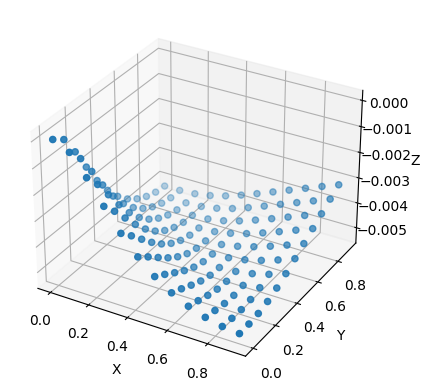

In [11]:
qinp_set
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
ax.scatter(qinp_set[:,0], qinp_set[:, 1],np.real(eps_mat_q[:,0,0]) )

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
ttkw.read_chi()

In [ ]:
ttkw.get_chimat()

In [ ]:
for i0_ in Gind_list:
    for i1_ in Gind_list:
        iix0, iiy0, iiz0 = ttkw.Chi0.G_ind2vec[i0_]
        iix1, iiy1, iiz1 = ttkw.Chi0.G_ind2vec[i1_]
        g0_ = [iix0, iiy0, iiz0]
        g1_ = [iix1, iiy1, iiz1]
        eps_Re_ = []
        eps_Im_ = []
        q_ = ttkw.Chi1.qpts[:]
        q0_ = ttkw.Chi0.qpts[:]
        q0_abs_ = np.sqrt((q0_[:,0])**2+ (np.sqrt(3)/3*(q0_[:,0])+2*np.sqrt(3)/3*(q0_[:,1]))**2)
        q1_abs_ = np.sqrt((q_[:,0])**2+ (np.sqrt(3)/3*(q_[:,0])+2*np.sqrt(3)/3*(q_[:,1]))**2)
        for i in range(1):
            #print(i)
            qind_ = i
            g_vec0_ = tuple(g0_)
            g_vec1_ = tuple(g1_)
            gind_rho0_ = ttkw.Chi0.G_vec2ind[g_vec0_]
            gind_rho1_ = ttkw.Chi0.G_vec2ind[g_vec1_]
            
            gind_eps0_ = ttkw.Chi0.gind_rho2eps[qind_, gind_rho0_]
            gind_eps1_ = ttkw.Chi0.gind_rho2eps[qind_, gind_rho1_]
            if (gind_eps0_ > 1000 or gind_eps1_ > 1000):
                continue     
            mat_Re_ = ttkw.Chi0.mat[qind_,0,0,gind_eps0_-1,gind_eps1_-1,0]
            mat_Im_ = ttkw.Chi0.mat[qind_,0,0,gind_eps0_-1,gind_eps1_-1,1]
            eps_Re_.append(mat_Re_)
            eps_Im_.append(mat_Im_)
        #    q_abs_ = np.hstack((np.array([]),q0_abs_))
        q_abs_ = []

        for i in range(1,144):
            #print(i)
            qind_ = i
            g_vec0_ = tuple(g0_)
            g_vec1_ = tuple(g1_)
            gind_rho0_ = ttkw.Chi1.G_vec2ind[g_vec0_]
            gind_rho1_ = ttkw.Chi1.G_vec2ind[g_vec1_]
            #print(gind_rho0_)
            #print(gind_rho1_)
            gind_eps0_ = ttkw.Chi1.gind_rho2eps[qind_, gind_rho0_]
            gind_eps1_ = ttkw.Chi1.gind_rho2eps[qind_, gind_rho1_]
            if (gind_eps0_ > 1000 or gind_eps1_ > 1000):
                continue     
            mat_Re_ = ttkw.Chi1.mat[qind_,0,0,gind_eps0_-1,gind_eps1_-1,0]
            mat_Im_ = ttkw.Chi1.mat[qind_,0,0,gind_eps0_-1,gind_eps1_-1,1]
            eps_Re_.append(mat_Re_)
            eps_Im_.append(mat_Im_)
        q_abs_ = np.hstack((q_abs_, q1_abs_[0:] ))

        y_re_data = np.array(eps_Re_)[:,np.newaxis]
        y_im_data = np.array(eps_Im_)[:,np.newaxis]
        if len(y_re_data) < 144:
            continue

        qpt = q_[:,:2]
        chi_mat_q[:,i,j] = y_re_data.flatten() + 1j*y_im_data.flatten()
        #print(qpt)
        #degree = 9
        #model_2d = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        #model_2d.fit(qpt, y_re_data)


        #q_inp = np.random.rand(500,2)
        #y_pred = model_2d.predict(q_inp)
        #q_zero = np.array([[0,0]])
        #y_zero = model_2d.predict(q_zero)
        #params = model_2d.named_steps['linearregression'].coef_
        #intercept = model_2d.named_steps['linearregression'].intercept_
        
        #print('Intercept: ', intercept)
        #print('Coefficients: ', params)

        #fig = plt.figure()
        #ax = fig.add_subplot(111, projection='3d')
        '''
        fig,ax = plt.subplots(1,2,figsize = (16,6), dpi = 100)
        #ax = fig.add_subplot(111)

        ax[0].scatter(range(len(qpt)), y_re_data,s = 50 ,label="exact")
        ax[0].scatter(range(len(qinp_set[:,0])),np.real(eps_mat_q[:,i0_,i1_]),s = 20,label="interpolation" )

        ax[1].scatter(range(len(qpt)), y_im_data, s = 50,label="exact")
        ax[1].scatter(range(len(qinp_set[:,0])),np.imag(eps_mat_q[:,i0_,i1_]),s =20,label="interpolation" )
        # Create a scatter plot
        #ax.scatter(qpt[:, 0], qpt[:, 1], y_re_data)
        #ax.scatter(qinp_set[:,0], qinp_set[:, 1],eps_mat_q[:,i0_,i1_] )
    #    ax.scatter(q_inp[:, 0], q_inp[:, 1], y_pred)
    #    ax.scatter(q_zero[:,0], q_zero[:,1], y_zero)
        # Set labels
        ax[0].set_xlabel('q-point index')
        ax[1].set_xlabel('q-point index')
        #ax.set_ylabel('Y')
        #ax.set_zlabel('Z')
        ax[0].legend()
        ax[1].legend()
        plt.show()
        #print(np.abs(y_re_data-np.real(eps_mat_q[:,i0_,i1_])))
        '''

In [ ]:
#eps_mat = csr_matrix((eps_values.flatten(),(eps_indices_i, eps_indices_j)),shape=(len(flatten_gind), len(flatten_gind)))

In [ ]:
Rho1 = io_xsf.Rho(cell['folder']+'drho.xsf')
pot_tot_k = np.fft.fftn(Rho1.rho)*ttkw.v_coul
pot_tot_k[0,0,0] = 0

In [62]:

phi_k = np.zeros_like(pot_tot_k, dtype=complex)
Gind_list = range(22)
phi_k[ttkw.g_rhoind_tt>=len(Gind_list)]=pot_tot_k[ttkw.g_rhoind_tt>=len(Gind_list)]
phik_list = []
val_len = len(ttkw.g_rhoind_tt[ttkw.g_rhoind_tt<len(Gind_list)])
gind_reduced = ttkw.g_rhoind_tt[ttkw.g_rhoind_tt<len(Gind_list)]
#g_tuple_q_reduced = ttkw.g_tuple_q_tt[ttkw.g_rhoind_tt<len(Gind_list)]
q_ind_reduced = q_ind_tt[ttkw.g_rhoind_tt<len(Gind_list)]
pot_reduced = pot_tot_k[ttkw.g_rhoind_tt<len(Gind_list)]
for i in range(val_len):
    G_index = gind_reduced[i]
    q_index = q_ind_reduced[i]
    #print(q_index)
    #print(q_ind_reduced[i])
    pot0 = pot_reduced[q_ind_reduced==q_index]
    eps_tmp = eps_mat_q[q_index,G_index,gind_reduced[q_ind_reduced==q_index]]

    phi_tmp=eps_tmp@pot0.T
    phik_list.append(phi_tmp)
    #print(i)
phi_k[ttkw.g_rhoind_tt<len(Gind_list)] = phik_list
    #ttkw.g_rhoind_tt[ttkw.g_rhoind_tt==i]

    #ttkw.g_tuple_q_tt
    #ttkw.v_coul
    

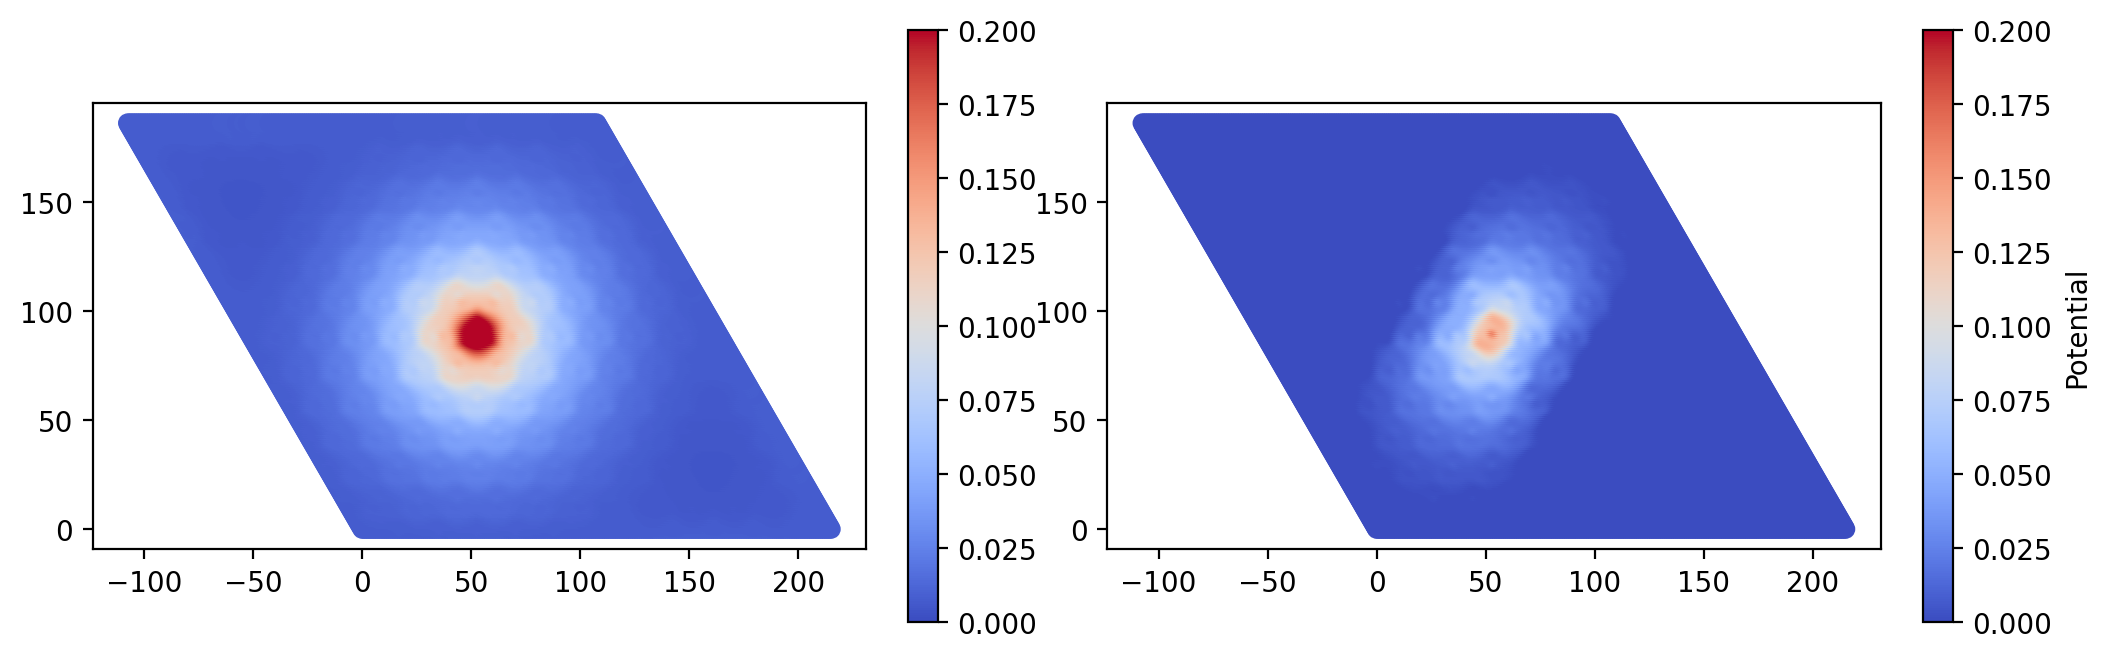

In [63]:
phi_k[0,0,0]=0
pot_tot_r = np.real(np.fft.ifftn(pot_tot_k))
pot_bare_r = np.real(np.fft.ifftn(phi_k))
nx,ny,nz = np.shape(pot_bare_r)
potential_2d1 = pot_tot_r[:,:,int(nz*0.5)]
potential_2d2 = pot_bare_r[:,:,int(nz*0.5)]

x = np.arange(0, potential_2d.shape[0])
y = np.arange(0, potential_2d.shape[1])

#x = np.copy(a)
#y = np.copy(b)


X, Y = np.meshgrid(x, y)

x = X.flatten()-0.5*Y.flatten()
y = Y.flatten()*np.sqrt(3)*0.5 #- X.flatten()*0.5
z1 = potential_2d1.flatten()
z2 = potential_2d2.flatten()
fig, ax = plt.subplots(1,2,figsize=(12,6),dpi=200)
hb1 = ax[0].scatter(x, y, c=z1, 
                #gridsize=100,
                vmax=0.2,
                vmin=0.0,
                    cmap='coolwarm')
ax[0].set_aspect('equal', adjustable='box')
#ax.set_xlim(0, 180)
#ax.set_ylim(0, 180)
cb = fig.colorbar(hb1, ax=ax[0],fraction = 0.035)
hb2 = ax[1].scatter(x, y, c=z2, 
                #gridsize=100,
                vmax=0.2,
                vmin=0.0,
                    cmap='coolwarm')
ax[1].set_aspect('equal', adjustable='box')
#ax.set_xlim(0, 180)
#ax.set_ylim(0, 180)
cb = fig.colorbar(hb2, ax=ax[1],fraction = 0.035)
cb.set_label('Potential')
plt.show()
#Rho1.rho = np.real(pot_tot_r)
#io_xsf.write_xsf(Rho1, xsf_type='rho', filedir=cell['folder']+'test.xsf')

In [47]:
ttkw.g_rhoind_tt[0,0,:]

array([    0,     2,     4,     6,     8,    10,    12,    14,    16,
          18,    20,    22,    66,   104,   118,   144,   170,   184,
         198,   224,   256,   330,   380,   418,   546,   620,   682,
         744,   782,   844,   894,  1064,  1222,  1332,  1454,  1618,
        1764,  1898,  1996,  2118,  2246,  2428,  2718,  2996,  3178,
        3372,  3530,  3814,  4056,  4238,  4408,  4806,  5108,  5506,
        5868,  6170,  6472,  6774,  7130,  7420,  7776,  8246,  8764,
        9174,  9524, 10186, 10596, 11042, 11416, 11838, 12410, 13072,
       13710, 14384, 14926, 15456, 16118, 16780, 17334, 17900, 18484,
       19392, 20174, 20980, 21834, 22604, 23278, 24072, 24926, 25636,
       26501, 25635, 24925, 24071, 23277, 22603, 21833, 20979, 20173,
       19391, 18483, 17899, 17333, 16779, 16117, 15455, 14925, 14383,
       13709, 13071, 12409, 11837, 11415, 11041, 10595, 10185,  9523,
        9173,  8763,  8245,  7775,  7419,  7129,  6773,  6471,  6169,
        5867,  5505,

In [55]:
q_ind_tt[-1,-1,:]

array([143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143])

In [50]:
qvec2ind

{(0.0, 0.0, 0.0): 0,
 (0.0, 0.08333333, 0.0): 1,
 (0.0, 0.16666667, 0.0): 2,
 (0.0, 0.25, 0.0): 3,
 (0.0, 0.33333333, 0.0): 4,
 (0.0, 0.41666667, 0.0): 5,
 (0.0, 0.5, 0.0): 6,
 (0.0, 0.58333333, 0.0): 7,
 (0.0, 0.66666667, 0.0): 8,
 (0.0, 0.75, 0.0): 9,
 (0.0, 0.83333333, 0.0): 10,
 (0.0, 0.91666667, 0.0): 11,
 (0.08333333, 0.0, 0.0): 12,
 (0.08333333, 0.08333333, 0.0): 13,
 (0.08333333, 0.16666667, 0.0): 14,
 (0.08333333, 0.25, 0.0): 15,
 (0.08333333, 0.33333333, 0.0): 16,
 (0.08333333, 0.41666667, 0.0): 17,
 (0.08333333, 0.5, 0.0): 18,
 (0.08333333, 0.58333333, 0.0): 19,
 (0.08333333, 0.66666667, 0.0): 20,
 (0.08333333, 0.75, 0.0): 21,
 (0.08333333, 0.83333333, 0.0): 22,
 (0.08333333, 0.91666667, 0.0): 23,
 (0.16666667, 0.0, 0.0): 24,
 (0.16666667, 0.08333333, 0.0): 25,
 (0.16666667, 0.16666667, 0.0): 26,
 (0.16666667, 0.25, 0.0): 27,
 (0.16666667, 0.33333333, 0.0): 28,
 (0.16666667, 0.41666667, 0.0): 29,
 (0.16666667, 0.5, 0.0): 30,
 (0.16666667, 0.58333333, 0.0): 31,
 (0.16666667, 